<h2>Task 2 - Responsible AI</h2>
Understanding how AI leads to better decisions.

<h3>Bank Marketing</h3>
<h4>Abstract:</h4>
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

<h4>Attribute Information:</h4>
Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

 - Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - Previous: number of contacts performed before this campaign and for this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:

 - Emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Analysis Steps:
 - Atribute information Analysis.
 - Machine Learning (Logistic Regression, KNN, SVM, Decision Tree,
 - Random Forest, Naive Bayes)
 - Deep Learning (ANN)

Source: Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import the dataset
data = pd.read_csv("bank-additional-full.csv")

# check shape of the data
data.shape

(41188, 21)

In [3]:
# check first five records
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# datatypes present
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [5]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# concise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# check for duplicate records
data.duplicated().sum()

np.int64(12)

In [8]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
# remove duplicates
data = data.drop_duplicates()

In [10]:
# missing values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


#### Insights:
 - The bank dataset has 41188 records and 21 feature varialbles.
 - There were total of 12 duplicate records found and removed.
 - No null/missing values are found.

In [11]:
# numerical and categorical variables
num_var = data.select_dtypes(exclude="object").columns
print("Numerical Columns:\n", num_var)

cat_var = data.select_dtypes(include="object").columns
print("Categorical Columns:\n", cat_var)

Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


### Exploratory Data Analysis (EDA) - Univariate Analysis (Numerical Columns)

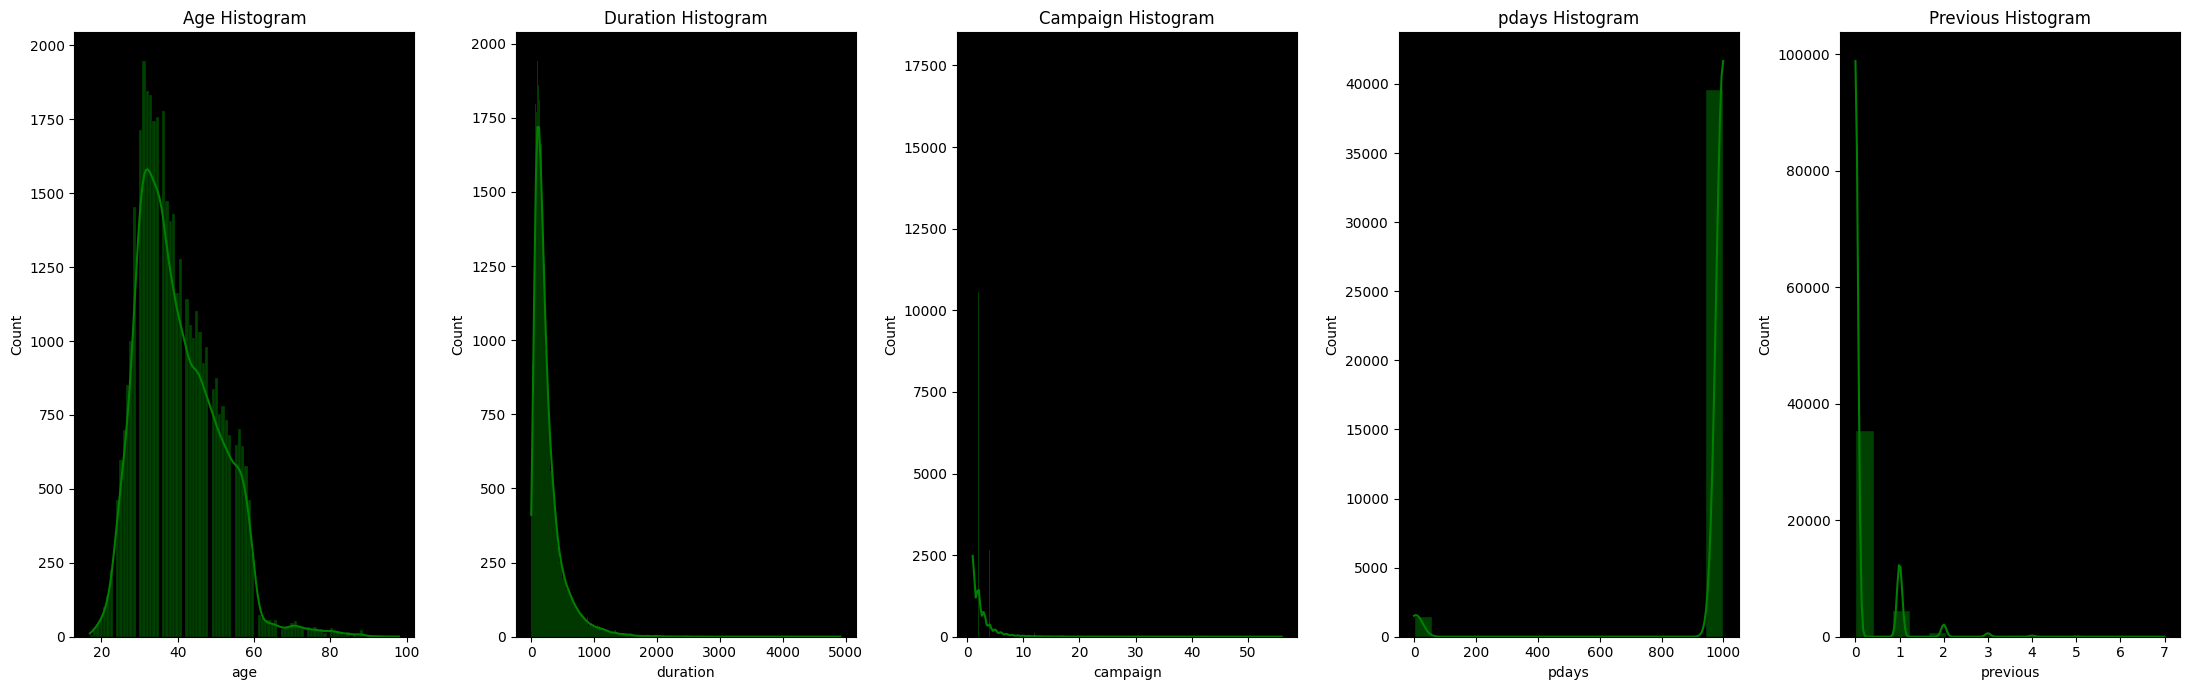

In [12]:
plt.figure(figsize=(22,7))

# age
ax1 = plt.subplot2grid((1,5),(0,0))
sns.histplot(data=data, x='age', kde=True, color='green', ax=ax1)
ax1.set_facecolor('black')
plt.title("Age Histogram")

# duration
ax2 = plt.subplot2grid((1,5),(0,1))
sns.histplot(data=data, x='duration', kde=True, color='green', ax=ax2)
ax2.set_facecolor('black')
plt.title("Duration Histogram")

# campaign
ax3 = plt.subplot2grid((1,5),(0,2))
sns.histplot(data=data, x='campaign', kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("Campaign Histogram")

# pdays
ax4 = plt.subplot2grid((1,5),(0,3))
sns.histplot(data=data, x='pdays', kde=True, color='green', ax=ax4)
ax4.set_facecolor('black')
plt.title("pdays Histogram")

# previous
ax5 = plt.subplot2grid((1,5),(0,4))
sns.histplot(data=data, x='previous', kde=True, color='green', ax=ax5)
ax5.set_facecolor('black')
plt.title("Previous Histogram")

plt.tight_layout()
plt.show()

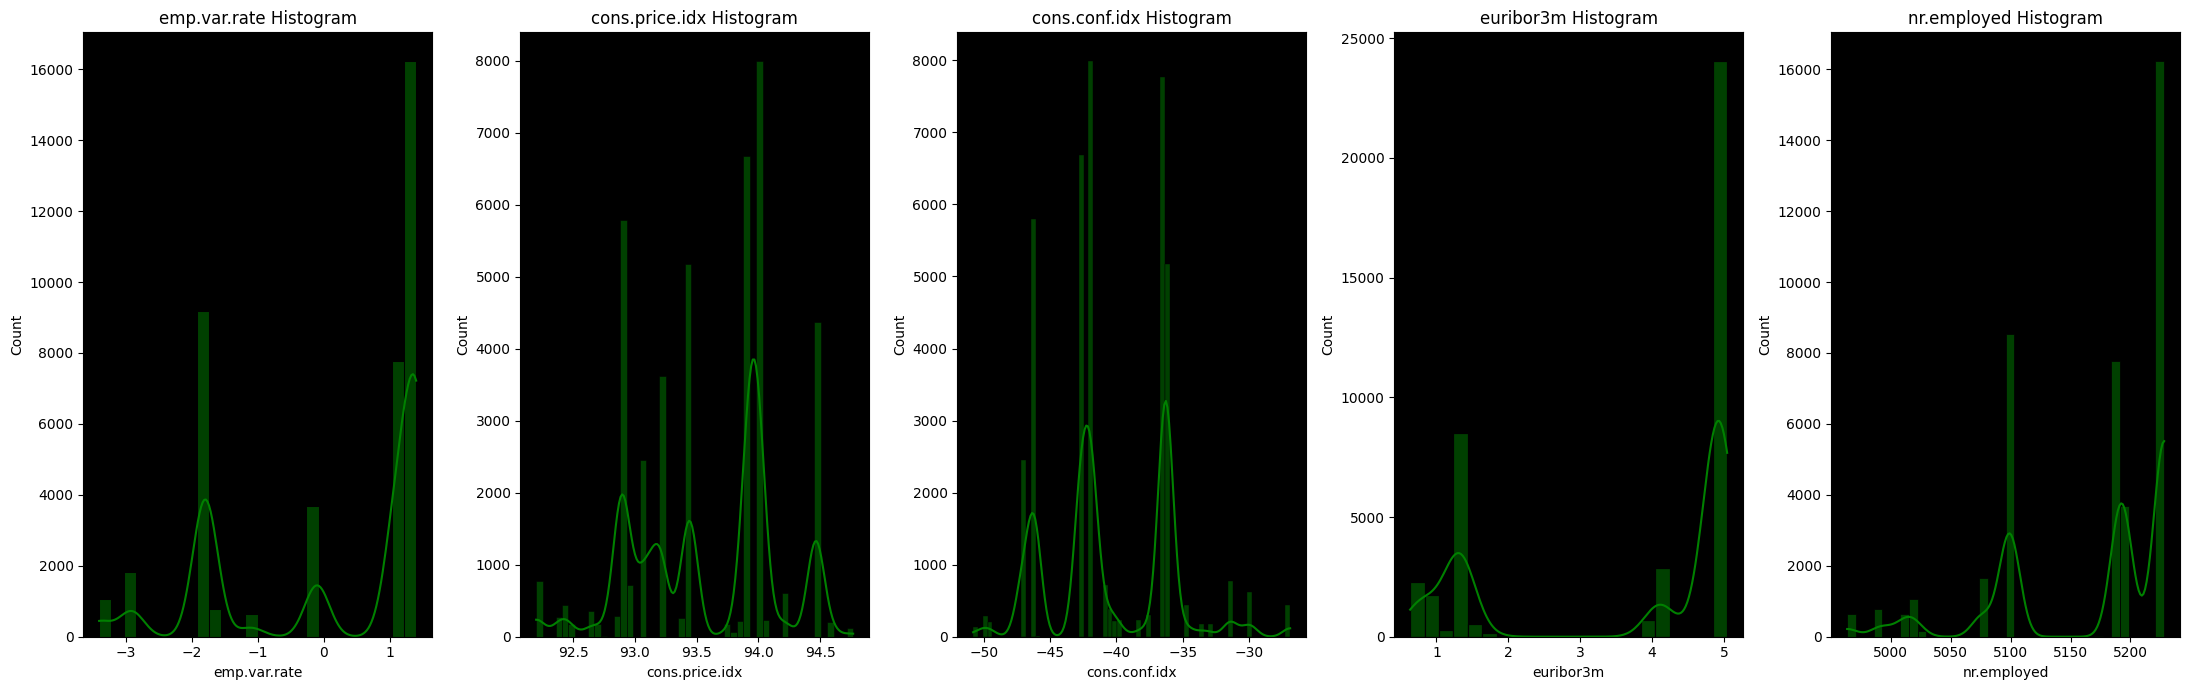

In [13]:
plt.figure(figsize=(22,7))

# emp.var.rate

ax1 = plt.subplot2grid((1,5),(0,0))
sns.histplot(data=data, x='emp.var.rate', kde=True, color='green', ax=ax1)
ax1.set_facecolor('black')
plt.title("emp.var.rate Histogram")

# cons.price.idx

ax2 = plt.subplot2grid((1,5),(0,1))
sns.histplot(data=data, x='cons.price.idx', kde=True, color='green', ax=ax2)
ax2.set_facecolor('black')
plt.title("cons.price.idx Histogram")

# cons.conf.idx

ax3 = plt.subplot2grid((1,5),(0,2))
sns.histplot(data=data, x='cons.conf.idx', kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("cons.conf.idx Histogram")

# euribor3m

ax4 = plt.subplot2grid((1,5),(0,3))
sns.histplot(data=data, x='euribor3m', kde=True, color='green', ax=ax4)
ax4.set_facecolor('black')
plt.title("euribor3m Histogram")

# nr.employed

ax5 = plt.subplot2grid((1,5),(0,4))
sns.histplot(data=data, x='nr.employed', kde=True, color='green', ax=ax5)
ax5.set_facecolor('black')
plt.title("nr.employed Histogram")

plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA) - Univariate Analysis (Categorical Columns)

In [14]:
for i in cat_var:
    print(i,'\n', data[i].value_counts())
    print("X"*30)

job 
 job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
marital 
 marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
education 
 education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
default 
 default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
housing 
 housing
yes        21571
no         18615
unknown      990
Name

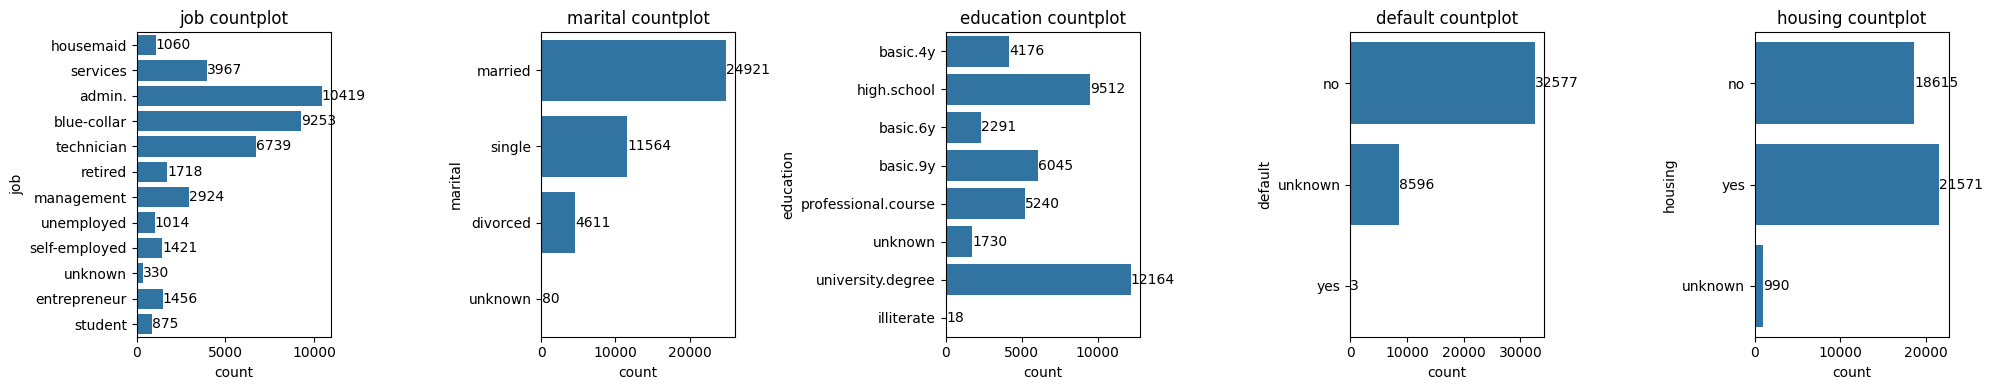

In [15]:
plt.figure(figsize=(20,4))

# job

ax1 = plt.subplot2grid((1,5),(0,0))
sns.countplot(data=data, y='job', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("job countplot")

# marital

ax2 = plt.subplot2grid((1,5),(0,1))
sns.countplot(data=data, y='marital', ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("marital countplot")

# education

ax3 = plt.subplot2grid((1,5),(0,2))
sns.countplot(data=data, y='education', ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("education countplot")

# default

ax4 = plt.subplot2grid((1,5),(0,3))
sns.countplot(data=data, y='default', ax=ax4)
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("default countplot")

# housing

ax5 = plt.subplot2grid((1,5),(0,4))
sns.countplot(data=data, y='housing', ax=ax5)
for i in ax5.containers:
    ax5.bar_label(i)
plt.title("housing countplot")

plt.tight_layout()
plt.show()

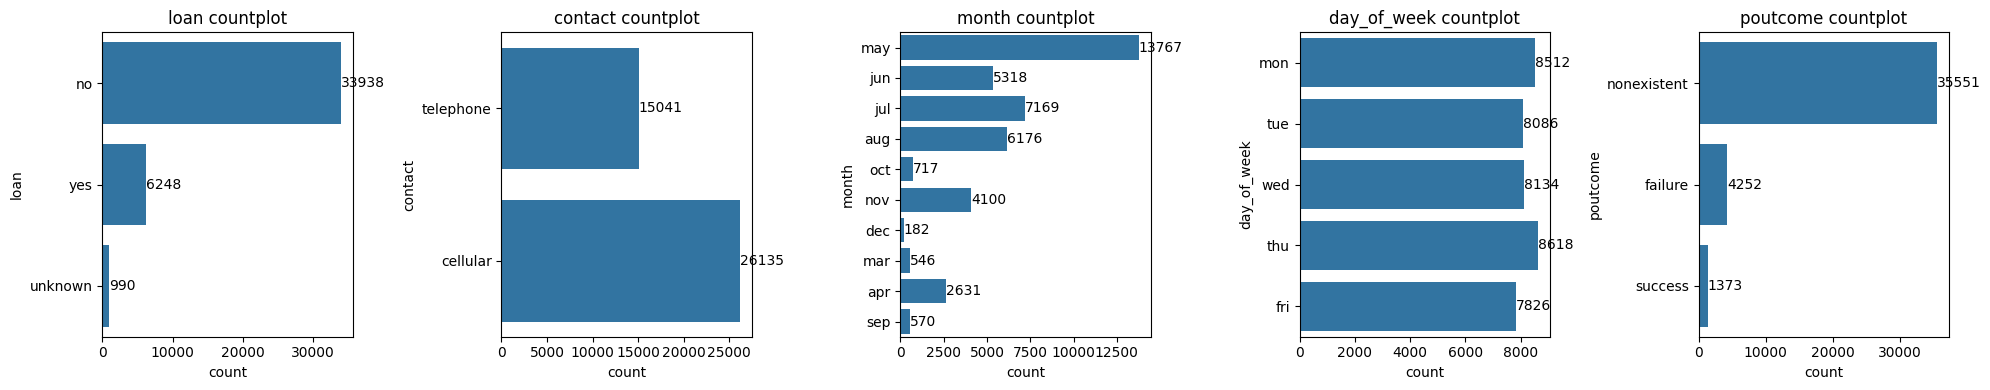

In [16]:
plt.figure(figsize=(20,4))

# loan

ax1 = plt.subplot2grid((1,5),(0,0))
sns.countplot(data=data, y='loan', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("loan countplot")

# contact

ax2 = plt.subplot2grid((1,5),(0,1))
sns.countplot(data=data, y='contact', ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("contact countplot")

# month

ax3 = plt.subplot2grid((1,5),(0,2))
sns.countplot(data=data, y='month', ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("month countplot")

# day_of_week

ax4 = plt.subplot2grid((1,5),(0,3))
sns.countplot(data=data, y='day_of_week', ax=ax4)
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("day_of_week countplot")

# poutcome

ax5 = plt.subplot2grid((1,5),(0,4))
sns.countplot(data=data, y='poutcome', ax=ax5)
for i in ax5.containers:
    ax5.bar_label(i)
plt.title("poutcome countplot")

plt.tight_layout()
plt.show()

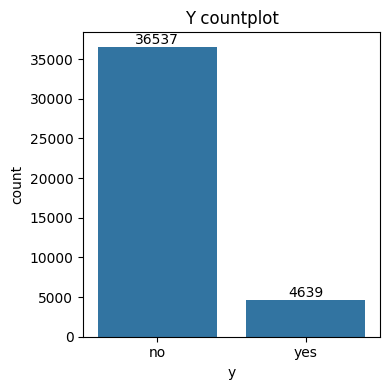

In [17]:
plt.figure(figsize=(4,4))
# y

ax1 = plt.subplot2grid((1,1),(0,0))
sns.countplot(data=data, x='y', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("Y countplot")

plt.tight_layout()
plt.show()

 - Most of the clients did not subscribed a term deposit. Since this is a target variable, the data is imbalanced.

### Exploratory Data Analysis (EDA) - Bivariate Analysis

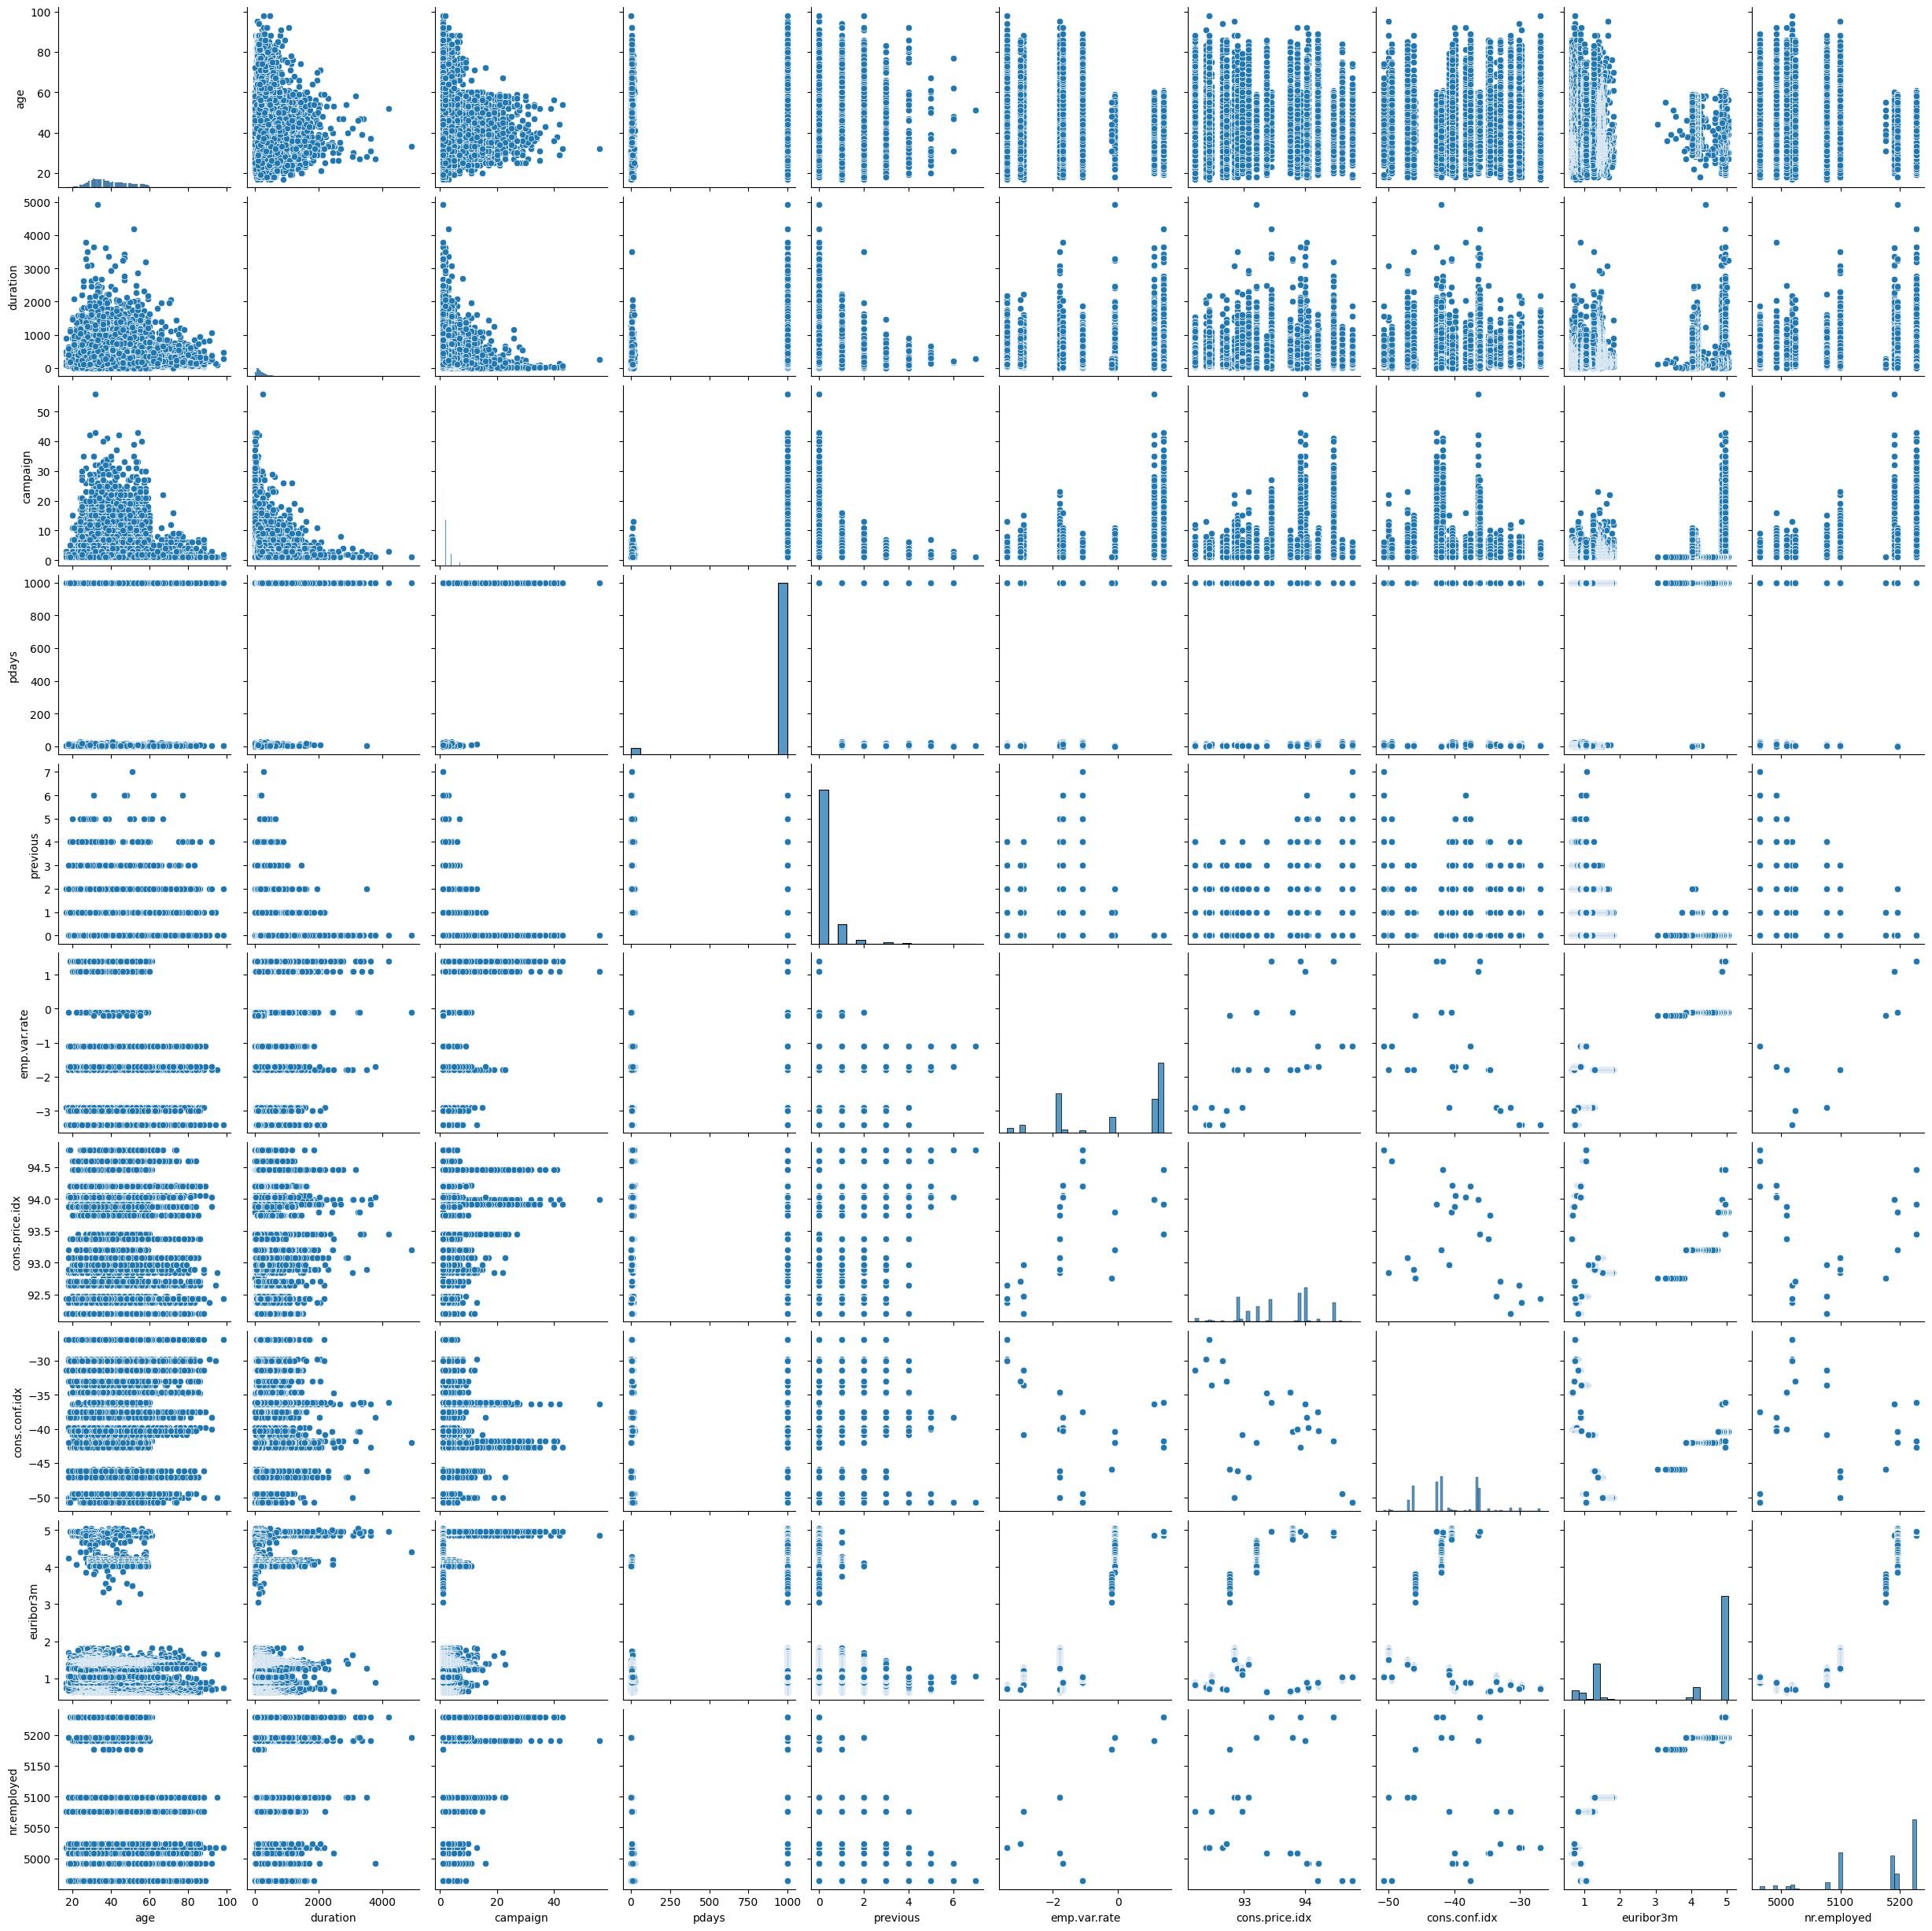

In [18]:
sns.pairplot(data)
plt.show()

<ipython-input-19-93d2b8b3eb99>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='y', y='age', data=data, ci=None, estimator=np.mean, ax=ax1)
<ipython-input-19-93d2b8b3eb99>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='y', y='duration', data=data, ci=None, estimator=np.mean, ax=ax2)
<ipython-input-19-93d2b8b3eb99>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='y', y='campaign', data=data, ci=None, estimator=np.mean, ax=ax3)
<ipython-input-19-93d2b8b3eb99>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='y', y='pdays', data=data_pdays, ci=None, estimator=np.mean, ax=ax4)
<ipython-input-19-93d2b8b3eb99>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='y', y='previo

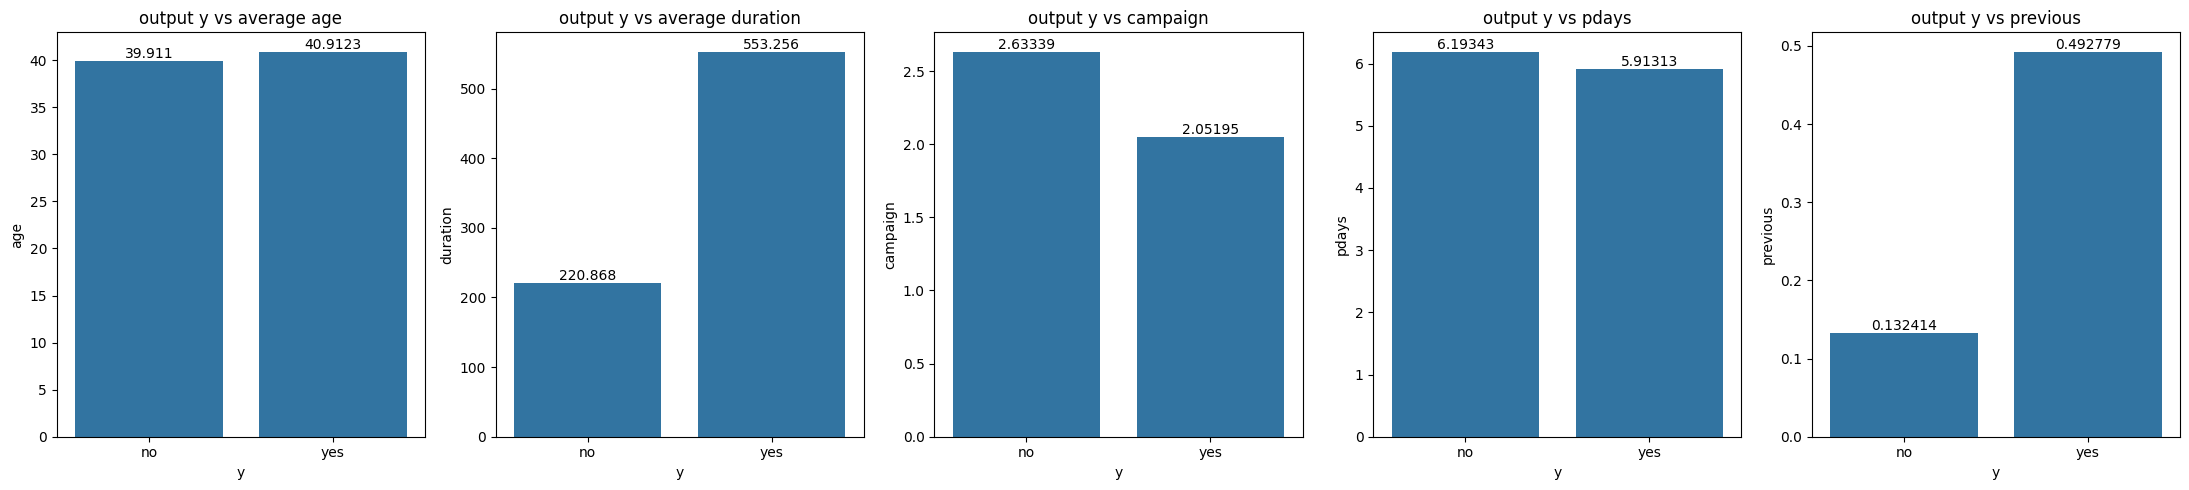

In [19]:
plt.figure(figsize=(22,5))

# output y vs average age

ax1 = plt.subplot2grid((1,5),(0,0))
sns.barplot(x='y', y='age', data=data, ci=None, estimator=np.mean, ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('output y vs average age')

# output y vs average duration

ax2 = plt.subplot2grid((1,5),(0,1))
sns.barplot(x='y', y='duration', data=data, ci=None, estimator=np.mean, ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title('output y vs average duration')

# output y vs campaign

ax3 = plt.subplot2grid((1,5),(0,2))
sns.barplot(x='y', y='campaign', data=data, ci=None, estimator=np.mean, ax=ax3)
for i in ax3.containers:
    plt.bar_label(i)
plt.title('output y vs campaign')

# output y vs pdays

data_pdays = data[data['pdays']!=999]

ax4 = plt.subplot2grid((1,5),(0,3))
sns.barplot(x='y', y='pdays', data=data_pdays, ci=None, estimator=np.mean, ax=ax4)
for i in ax4.containers:
    plt.bar_label(i)
plt.title('output y vs pdays')

# output y vs previous

data_pdays = data[data['pdays']!=999]

ax5 = plt.subplot2grid((1,5),(0,4))
sns.barplot(x='y', y='previous', data=data, ci=None, estimator=np.mean, ax=ax5)
for i in ax5.containers:
    plt.bar_label(i)
plt.title('output y vs previous')

plt.tight_layout()
plt.show()

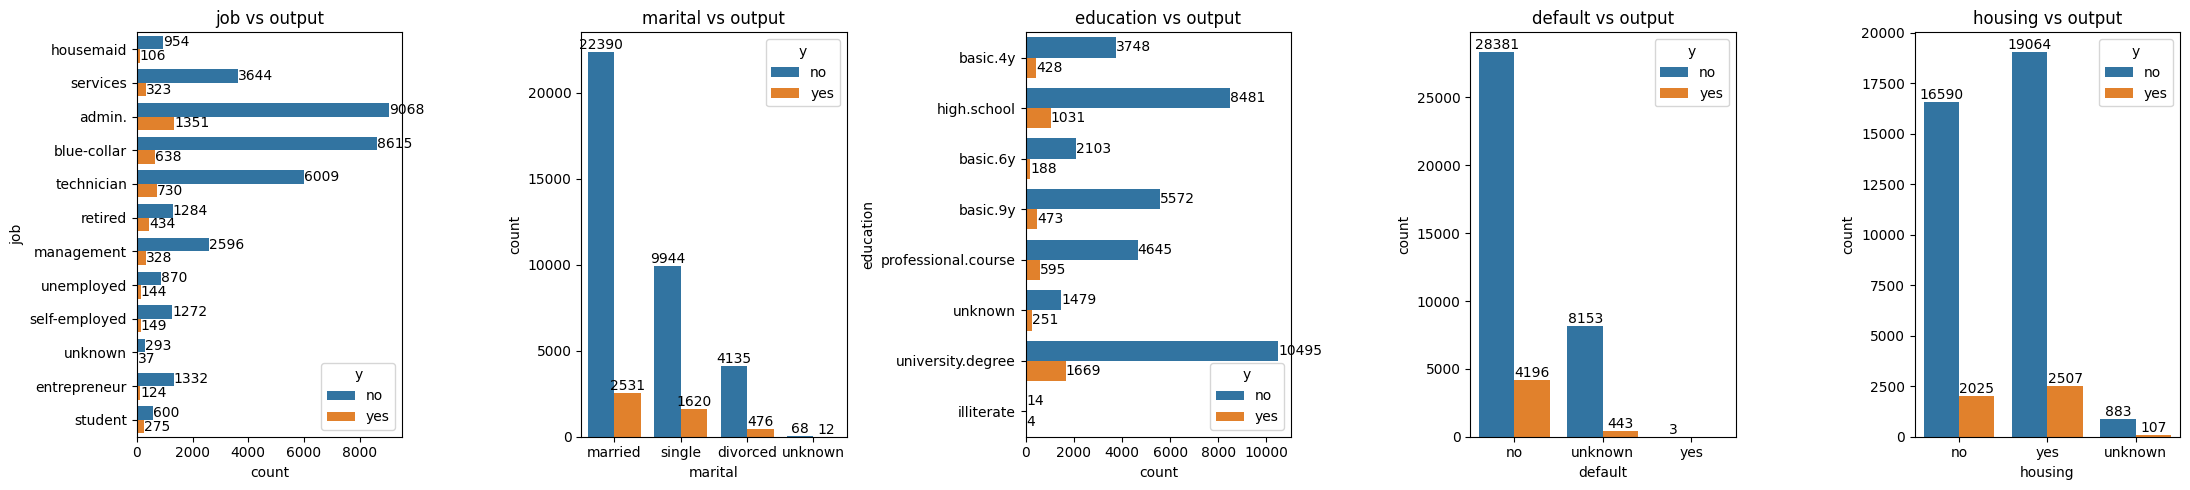

In [20]:
plt.figure(figsize=(22,5))

# job vs output

ax1 = plt.subplot2grid((1,5),(0,0))
sns.countplot(y='job', data=data, hue='y', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('job vs output')

# marital vs output

ax2 = plt.subplot2grid((1,5),(0,1))
sns.countplot(x='marital', data=data, hue='y', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title('marital vs output')

# education vs output

ax3 = plt.subplot2grid((1,5),(0,2))
sns.countplot(y='education', data=data, hue='y', ax=ax3)
for i in ax3.containers:
    plt.bar_label(i)
plt.title('education vs output')

# default vs output

ax4 = plt.subplot2grid((1,5),(0,3))
sns.countplot(x='default', data=data, hue='y', ax=ax4)
for i in ax4.containers:
    plt.bar_label(i)
plt.title('default vs output')

# housing vs output

ax5 = plt.subplot2grid((1,5),(0,4))
sns.countplot(x='housing', data=data, hue='y', ax=ax5)
for i in ax5.containers:
    plt.bar_label(i)
plt.title('housing vs output')

plt.tight_layout()
plt.show()

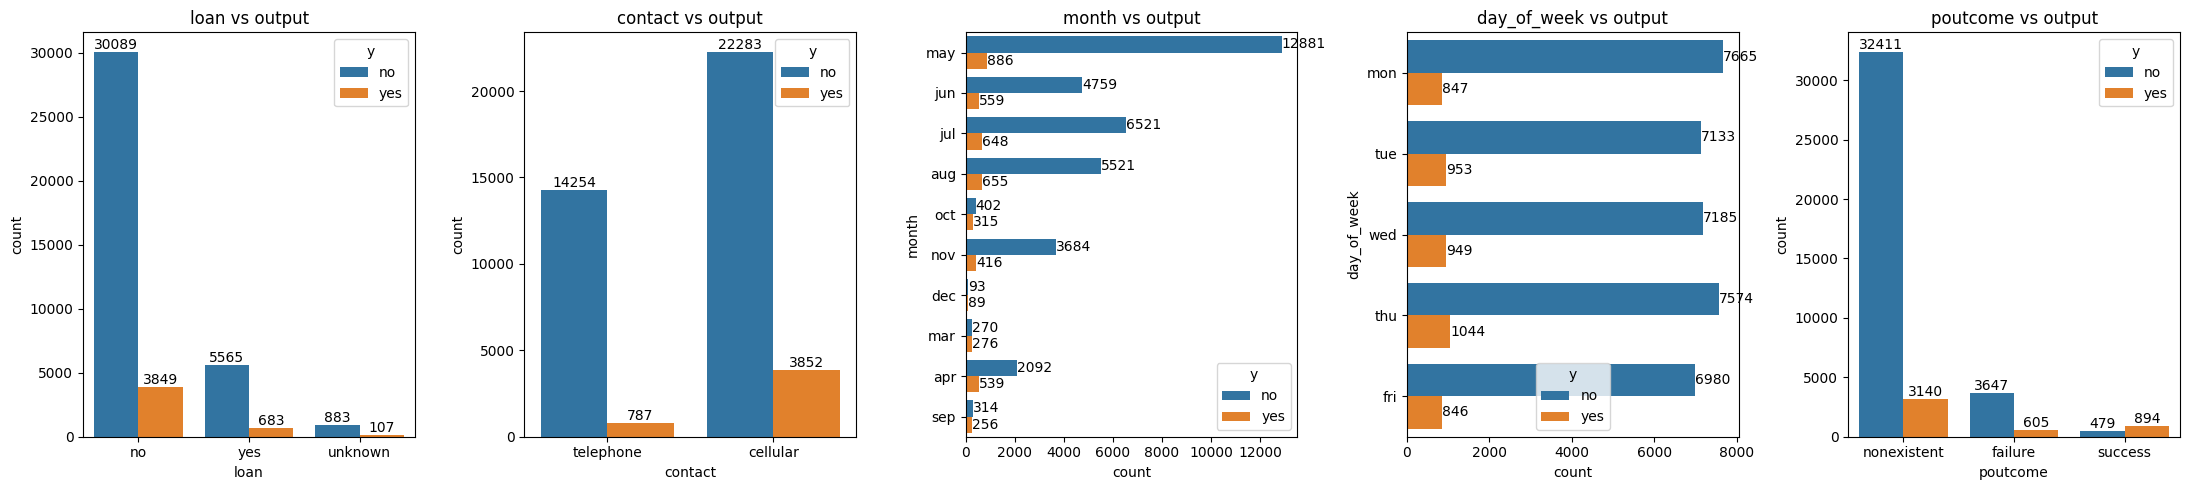

In [21]:
'loan', 'contact', 'month', 'day_of_week', 'poutcome'
plt.figure(figsize=(22,5))

# loan vs output

ax1 = plt.subplot2grid((1,5),(0,0))
sns.countplot(x='loan', data=data, hue='y', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('loan vs output')

# contact vs output

ax2 = plt.subplot2grid((1,5),(0,1))
sns.countplot(x='contact', data=data, hue='y', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title('contact vs output')

# month vs output

ax3 = plt.subplot2grid((1,5),(0,2))
sns.countplot(y='month', data=data, hue='y', ax=ax3)
for i in ax3.containers:
    plt.bar_label(i)
plt.title('month vs output')

# day_of_week vs output

ax4 = plt.subplot2grid((1,5),(0,3))
sns.countplot(y='day_of_week', data=data, hue='y', ax=ax4)
for i in ax4.containers:
    plt.bar_label(i)
plt.title('day_of_week vs output')

# poutcome vs output

ax5 = plt.subplot2grid((1,5),(0,4))
sns.countplot(x='poutcome', data=data, hue='y', ax=ax5)
for i in ax5.containers:
    plt.bar_label(i)
plt.title('poutcome vs output')

plt.tight_layout()
plt.show()

### Data Transformation

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop(['y'],axis=1)
y = data['y']

In [24]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [25]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [26]:
num_feat = X.select_dtypes(exclude='object').columns
cat_feat = X.select_dtypes(include='object').columns

print("Numerical Features:\n", num_feat)
print("Categorical Features:\n", cat_feat)

Numerical Features:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Features:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [27]:
# create an instance of Label Encoder, One Hot Encoder, Standard Scaler
le = LabelEncoder()
one_hot = OneHotEncoder()
ss = StandardScaler(with_mean=False)

In [28]:
# create pipelines for data transformation
category_pipeline = Pipeline(
    steps=[
        ('one hot encoder', one_hot),
        ('standard scaler', ss)
    ]
)

numerical_pipeline = Pipeline(
    steps=[
        ('standard scaler', ss)
    ]
)

In [29]:
# create a preprocessor for data transformation
preprocessor = ColumnTransformer([
    ("cat_pipeline", category_pipeline, cat_feat),
    ("num_pipeline", numerical_pipeline, num_feat)
])

In [30]:
# apply preprocessor to the data
X_transformed = preprocessor.fit_transform(X)

In [31]:
X_transformed[0:1:,:]

array([[  0.        ,   0.        ,   0.        ,   6.31440467,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.04582243,   0.        ,   0.        ,
          3.31255462,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          2.46016727,   0.        ,   0.        ,   2.00924762,
          0.        ,   0.        ,   2.62719158,   0.        ,
          0.        ,   0.        ,   2.07679939,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.1197171 ,   0.        ,   0.        ,
          0.        ,   0.        ,   2.46941263,   0.        ,
          0.        ,   0.        ,   0.        ,   2.91176942,
          0.        ,   5.37399486,   1.00654768,   0.36097373,
          5.34410838,   0.        ,   0.70025179, 162.38564391,
         -7.86550204,   2.80036633,  71.

In [32]:
# apply transformation on target feature
y_transformed = le.fit_transform(y)

In [33]:
y_transformed

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
# divide the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.25, random_state=999)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (30882, 63)
y_train: (30882,)
X_test: (10294, 63)
y_test: (10294,)


### Model Training

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1score = f1_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)
    classificationreport = classification_report(true, predicted)
    return accuracy, f1score, confusionmatrix, classificationreport

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    # 'Support Vector Classifier': SVC(),
    # 'Gaussian Naive Bayes': GaussianNB(),
    # 'K-Neighbors Classifier': KNeighborsClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=False),
    'XGBoost Classifier': XGBClassifier()
}
params = {
    "Logistic Regression": {},
    "XGBoost Classifier": {
        'learning_rate':[0.1,0.01,0.05],
        "n_estimators": [8,16,32,64,128,256]},
    "Decision Tree Classifier": {
        "max_depth": [3, 5, 7],
        "criterion": ['entropy', 'gini'],
        "splitter": ['best', 'random'],
        "max_features": ['sqrt','log2']},
    "Random Forest Classifier": {
        "criterion": ['entropy', 'gini'],
        "max_depth": [3, 5, 7],
        "max_features": ['sqrt','log2'],
        "n_estimators": [8,16,32,64,128,256]},
    "Gradient Boosting Classifier":{
        "criterion": ['friedman_mse', 'squared_error'],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.1, 0.01, 0.5],
        "max_features": ['sqrt','log2'],
        "n_estimators": [8,16,32,64,128,256]},
    "AdaBoost Classifier":{
        "learning_rate": [0.1, 0.01, 0.5],
        "algorithm": ['SAMME', 'SAMME.R'],
        "n_estimators": [8,16,32,64,128,256]},
    # "Support Vector Classifier":{
    #     "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    #     "gamma": ['scale', 'auto']},
    # "Gaussin Naive Bayes": {},
    "CatBoost Classifier": {
        'depth': [6,8],
        'learning_rate': [0.1, 0.01, 0.5],
        'iterations': [30, 50, 100]},
    "XGBoost Classifier": {
        'learning_rate':[0.1,0.01,0.05],
        "n_estimators": [8,16,32,64,128,256]}
    }

model_list = []
accuracy_list = []
f1score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    para = params[list(models.keys())[i]]

    # train model
    gs = GridSearchCV(model, para, cv=3)
    gs.fit(X_train, y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    train_accuracy, train_f1score, train_confusionmatrix, train_classificationreport = evaluate_model(y_train,y_train_pred)

    test_accuracy, test_f1score, test_confusionmatrix, test_classificationreport = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("**Accuracy Score:", train_accuracy)
    print("**F1 Score:", train_f1score)
    print("**Confusion Matrix: \n", train_confusionmatrix)
    print("**Classification Report: \n", train_classificationreport)

    print('-'*35)

    print('Model performance for Test set')
    print("**Accuracy Score:", test_accuracy)
    print("**F1 Score:", test_f1score)
    print("**Confusion Matrix: \n", test_confusionmatrix)
    print("**Classification Report: \n", test_classificationreport)

    accuracy_list.append(test_accuracy)
    f1score_list.append(test_f1score)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
**Accuracy Score: 0.9106599313515964
**F1 Score: 0.5146877748460862
**Confusion Matrix: 
 [[26660   731]
 [ 2028  1463]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     27391
           1       0.67      0.42      0.51      3491

    accuracy                           0.91     30882
   macro avg       0.80      0.70      0.73     30882
weighted avg       0.90      0.91      0.90     30882

-----------------------------------
Model performance for Test set
**Accuracy Score: 0.911987565572178
**F1 Score: 0.5144694533762058
**Confusion Matrix: 
 [[8908  238]
 [ 668  480]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9146
           1       0.67      0.42      0.51      1148

    accuracy                           0.91     10294
   macro avg       0.80      0.70      0.7

In [ ]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list, f1score_list)),columns=['Model Name','Accuracy Score', 'F1 Score']).sort_values(
    by=["F1 Score"],ascending=False)

,Model Name,Accuracy Score,F1 Score
5,CatBoost Classifier,0.918302,0.598951
6,XGBoost Classifier,0.916068,0.596262
3,Gradient Boosting Classifier,0.916068,0.588571
4,AdaBoost Classifier,0.912862,0.515920
0,Logistic Regression,0.911988,0.514469
1,Decision Tree Classifier,0.905479,0.454902
2,Random Forest Classifier,0.903925,0.333109


### Deep Learning ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_shape=(63,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=20, batch_size=300)

Epoch 1/20


103/103 [==============================] - 1s 7ms/step - loss: 0.8681 - accuracy: 0.8534
Epoch 2/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2563 - accuracy: 0.8985
Epoch 3/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2299 - accuracy: 0.9044
Epoch 4/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2115 - accuracy: 0.9076
Epoch 5/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2106 - accuracy: 0.9070
Epoch 6/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2126 - accuracy: 0.9071
Epoch 7/20
103/103 [==============================] - 1s 7ms/step - loss: 0.2015 - accuracy: 0.9080
Epoch 8/20
103/103 [==============================] - 1s 7ms/step - loss: 0.1997 - accuracy: 0.9068
Epoch 9/20
103/103 [==============================] - 1s 7ms/step - loss: 0.1993 - accuracy: 0.9060
Epoch 10/20
103/103 [==============================] - 1s 7ms/step - loss: 0.1955 - accuracy: 0.9083
Epoch 11/2

In [ ]:
y_pred = (model.predict(X_test)>0.5).astype(int)

In [ ]:
results = evaluate_model(true=y_test, predicted=y_pred)

In [ ]:
print('Model performance for Test set')
print("**Accuracy Score:", results[0])
print("**F1 Score:", results[1])
print("**Confusion Matrix: \n", results[2])
print("**Classification Report: \n", results[3])

Model performance for Test set
**Accuracy Score: 0.908587526714591
**F1 Score: 0.4251679902260232
**Confusion Matrix: 
 [[9005  141]
 [ 800  348]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9146
           1       0.71      0.30      0.43      1148

    accuracy                           0.91     10294
   macro avg       0.82      0.64      0.69     10294
weighted avg       0.90      0.91      0.89     10294

